In [1]:
import torch
import sys

sys.path.append('..')

import SourceCode

In [2]:
import torch
from SourceCode.EquationClass import MainEquationClass
from SourceCode.utilities import plot_two_1d_functions
from SourceCode.DomainClass import OneDimensionalSimpleDomain
from SourceCode.IntegralEquations import IntegralEquations
from SourceCode.TrainerForNNEquationSolver import TrainerForNNEquationSolver
from SourceCode.ReportMaker import ReportMaker
from math import pi

from scipy.special import gamma
from math import pi
from math import sqrt

n_epochs = 10
n_points = 20

# №1 Fredholm's equation

### $$ y(x) = sin(\pi*x) + \frac{1}{2}\int_{0}^1y(t)dt $$ ###

$$ analytical solution: y(x) = sin(\pi x) + \frac{2}{\pi} $$

In [22]:
left_border = 0
right_border = 1
n_points = 20
n_int_points = 50
integration_func = lambda curr_v, int_domain, nn_model: nn_model(int_domain)
main_eq_res = (lambda curr_v, nn_model: nn_model(curr_v) -
                                            torch.sin(pi * curr_v) - 
               0.5 * IntegralEquations.calculateFredholmEquation1D(
                                                        integration_func,
                                                        nn_model,
                                                        curr_v,
                                                        left_border,
                                                        right_border,
                                                        n_int_points))
main_domain = OneDimensionalSimpleDomain(0, 1, n_points, offset=0)

main_eq = MainEquationClass(main_domain, main_eq_res)
n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs, 
                                           n_hidden_layers=3,
                                          n_hidden_neurons=10,
                                          lr=0.1,
                                          seed=77)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

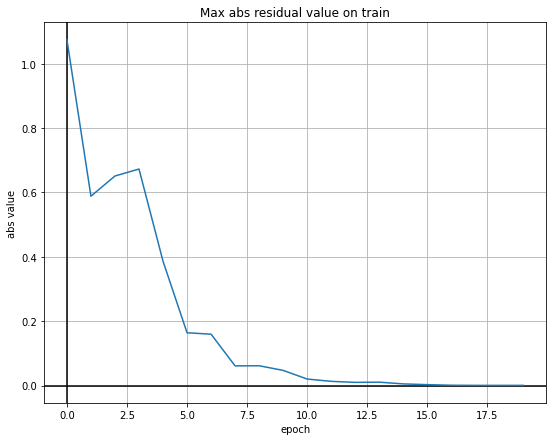

In [23]:
analytical_solution = lambda x_var: torch.sin(pi * x_var) + 2 / pi
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.0004949569702148438
Valid max absolute error |Appr(x)-y(x)|: 0.0004525184631347656
MAPE on train data: 0.019439055176917464 %
MAPE on validation data: 0.017230560479220003 %
Max abs value of residual on train at last epoch: 0.0004087090492248535 


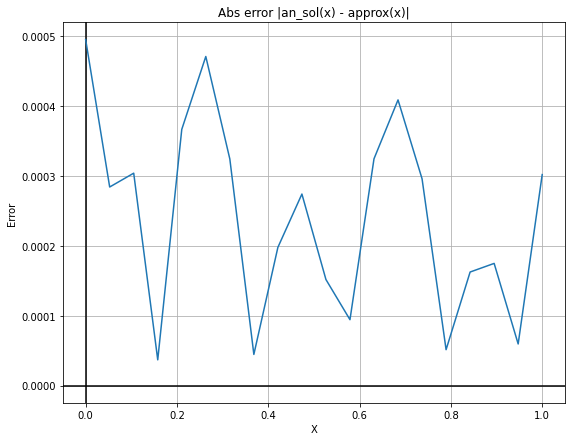

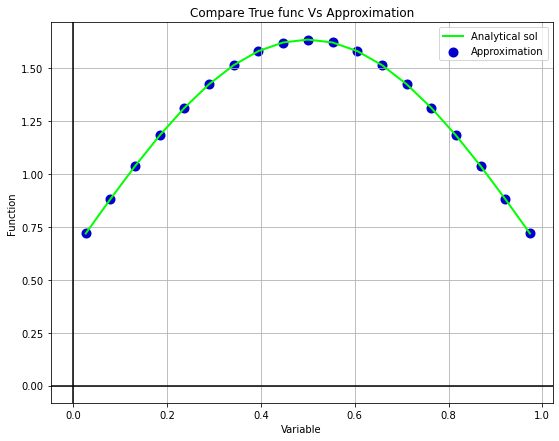

In [24]:
report.compare_appr_with_analytical()

In [25]:
report.print_comparison_table()

train data
     Input_X  Analytical_F     ANN_F  Abs error
0   0.000000      0.636620  0.637115   0.000495
1   0.052632      0.801214  0.800930   0.000284
2   0.105263      0.961319  0.961015   0.000304
3   0.157895      1.112567  1.112604   0.000037
4   0.210526      1.250833  1.251199   0.000366
5   0.263158      1.372344  1.372814   0.000471
6   0.315789      1.473786  1.474110   0.000324
7   0.368421      1.552393  1.552438   0.000044
8   0.421053      1.606020  1.605822   0.000198
9   0.473684      1.633204  1.632930   0.000274
10  0.526316      1.633204  1.633053   0.000152
11  0.578947      1.606020  1.606114   0.000094
12  0.631579      1.552393  1.552717   0.000324
13  0.684211      1.473786  1.474195   0.000409
14  0.736842      1.372344  1.372639   0.000296
15  0.789474      1.250833  1.250884   0.000051
16  0.842105      1.112567  1.112405   0.000162
17  0.894737      0.961319  0.961144   0.000175
18  0.947368      0.801214  0.801274   0.000059
19  1.000000      0.636620  0

# № 2

### $$y(x) = \frac{1}{2}\int_{0}^{\frac{\pi}{2}}xsin(t)y(t)dt + sin(x)$$ ### 
### $$true\_sol = sin(x) + \frac{\pi x}{4}$$ ###

In [39]:
left_border = 0
right_border = pi/2
n_points = 20
n_int_points = 100
integration_func = lambda curr_v, int_domain, nn_model: curr_v * torch.sin(int_domain) * nn_model(int_domain)
main_eq_res = (lambda curr_v, nn_model: nn_model(curr_v) - 
               0.5 * IntegralEquations.calculateFredholmEquation1D(
                                    integration_func,
                                    nn_model,
                                    curr_v,
                                    left_border,
                                    right_border,
                                    n_int_points) - torch.sin(curr_v))
main_domain = OneDimensionalSimpleDomain(0, 1, n_points, offset=0)

main_eq = MainEquationClass(main_domain, main_eq_res)
n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs, n_hidden_layers=3,
                                          n_hidden_neurons=20,
                                          lr=0.1)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

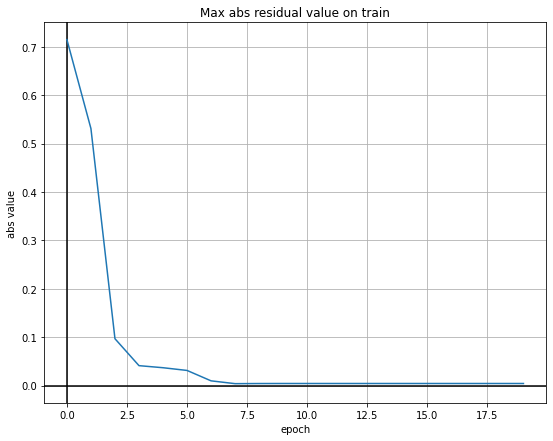

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.004148542881011963
Valid max absolute error |Appr(x)-y(x)|: 0.003048539161682129
MAPE on train data: 0.18335781060159206 %
MAPE on validation data: 0.1618402311578393 %
Max abs value of residual on train at last epoch: 0.004148542881011963 


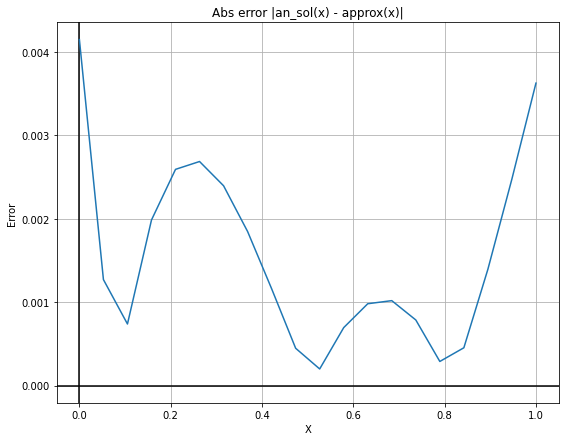

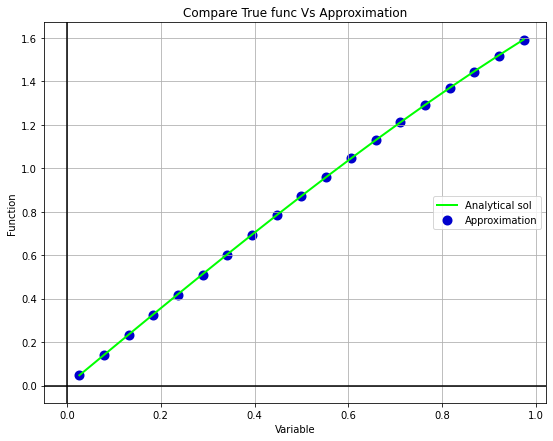

In [42]:
analytical_solution = lambda x_var: torch.sin(x_var) + pi * x_var / 4
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

In [43]:
report.print_comparison_table()

train data
     Input_X  Analytical_F     ANN_F  Abs error
0   0.000000      0.000000  0.004149   0.004149
1   0.052632      0.093944  0.095214   0.001270
2   0.105263      0.187742  0.187005   0.000738
3   0.157895      0.281250  0.279265   0.001985
4   0.210526      0.374322  0.371729   0.002592
5   0.263158      0.466815  0.464129   0.002686
6   0.315789      0.558587  0.556192   0.002395
7   0.368421      0.649500  0.647653   0.001847
8   0.421053      0.739415  0.738255   0.001160
9   0.473684      0.828199  0.827752   0.000446
10  0.526316      0.915719  0.915917   0.000198
11  0.578947      1.001847  1.002542   0.000694
12  0.631579      1.086461  1.087441   0.000981
13  0.684211      1.169439  1.170457   0.001018
14  0.736842      1.250667  1.251453   0.000786
15  0.789474      1.330034  1.330322   0.000288
16  0.842105      1.407435  1.406982   0.000453
17  0.894737      1.482769  1.481375   0.001394
18  0.947368      1.555943  1.553467   0.002477
19  1.000000      1.626869  1

#  № 3

### $$ y(x) =  \int_{0}^{1}(\sqrt{xt}y(t)dt + x$$ ###
### $$ true\_sol =  x + \frac{4}{5}\sqrt{x}$$ ###

In [178]:
n_int_points = 50
left_border = 0
right_border = 1
n_points = 20
integration_func = lambda curr_v, int_domain, nn_model: torch.sqrt(curr_v * int_domain) * nn_model(int_domain)
main_eq_res = (lambda curr_v, nn_model: nn_model(curr_v) - 
               IntegralEquations.calculateFredholmEquation1D(
                                            integration_func,
                                            nn_model,
                                            curr_v,
                                            left_border,
                                            right_border,
                                            n_points) - curr_v)
main_domain = OneDimensionalSimpleDomain(0, 1, n_points, offset=0)

main_eq = MainEquationClass(main_domain, main_eq_res)
n_epochs = 40
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs, n_hidden_layers=1,
                                          n_hidden_neurons=50,
                                          lr=0.1)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

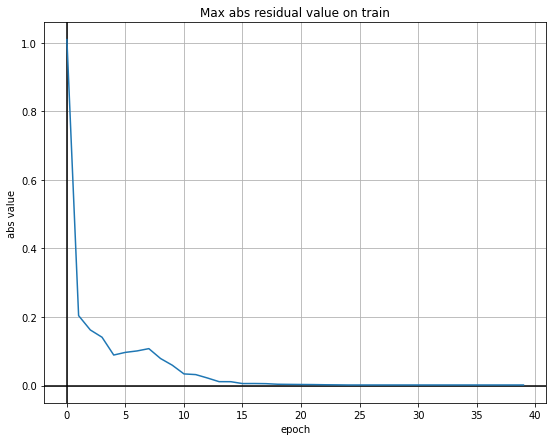

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.0013639330863952637
Valid max absolute error |Appr(x)-y(x)|: 0.014074131846427917
MAPE on train data: 0.044849319965578616 %
MAPE on validation data: 0.11392994783818722 %
Max abs value of residual on train at last epoch: 0.0015218108892440796 


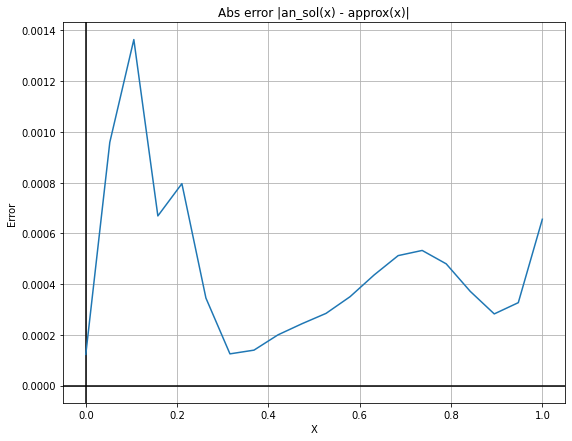

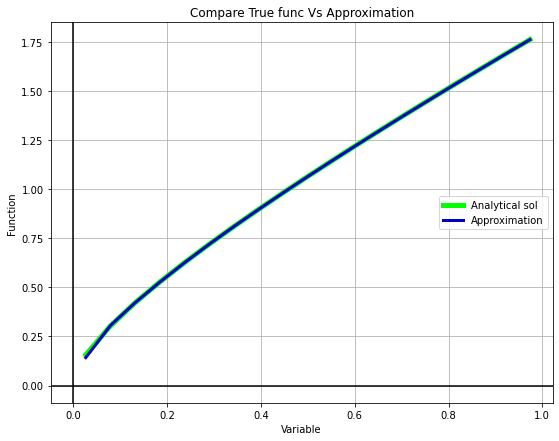

In [179]:
analytical_solution = lambda x_var: x_var + torch.sqrt(x_var) * 0.8
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

In [177]:
report.print_comparison_table()

train data
     Input_X  Analytical_F     ANN_F  Abs error
0   0.000000      0.000000  0.002868   0.002868
1   0.052632      0.236164  0.226393   0.009771
2   0.105263      0.364817  0.370824   0.006007
3   0.157895      0.475782  0.480669   0.004886
4   0.210526      0.577591  0.577368   0.000224
5   0.263158      0.673549  0.669945   0.003604
6   0.315789      0.765351  0.761240   0.004111
7   0.368421      0.854003  0.851428   0.002575
8   0.421053      0.940161  0.939848   0.000313
9   0.473684      1.024282  1.025880   0.001598
10  0.526316      1.106697  1.109244   0.002547
11  0.578947      1.187656  1.190042   0.002386
12  0.631579      1.267354  1.268662   0.001308
13  0.684211      1.345947  1.345663   0.000284
14  0.736842      1.423558  1.421641   0.001917
15  0.789474      1.500292  1.497179   0.003114
16  0.842105      1.576236  1.572770   0.003466
17  0.894737      1.651461  1.648815   0.002646
18  0.947368      1.726031  1.725602   0.000430
19  1.000000      1.800000  1

# № 4 Volterra's equation

### $$ y(x) = sin(x) + \int_{0}^{x}sin(x-t)y(t)dt$$ ###
### $$ true\_sol =  x $$ ###

$$x \in [0,1]$$

In [52]:
left_border = 0
right_border = 1
n_points = 20
n_int_points = 50
integration_func = lambda curr_v, int_domain, nn_model: torch.sin(curr_v - int_domain) * nn_model(int_domain)
main_eq_res = (lambda curr_v, nn_model: nn_model(curr_v) - torch.sin(curr_v) - 
               IntegralEquations.calculateVolterraEquation1D(
                                            integration_func,
                                            nn_model,
                                            curr_v,
                                            left_border,
                                            right_border,
                                            n_points))
main_domain = OneDimensionalSimpleDomain(0, 1, n_points, offset=0)

main_eq = MainEquationClass(main_domain, main_eq_res)
n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs, n_hidden_layers=3,
                                          n_hidden_neurons=10,
                                          lr=0.5)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

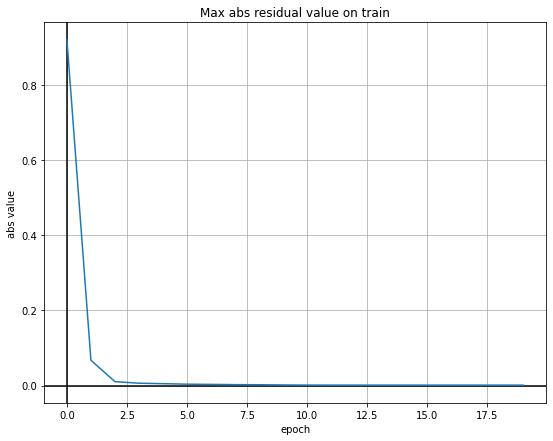

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.0009483695030212402
Valid max absolute error |Appr(x)-y(x)|: 0.0009039044380187988
MAPE on train data: 0.1177418977022171 %
MAPE on validation data: 0.11849415022879839 %
Max abs value of residual on train at last epoch: 0.0009609460830688477 


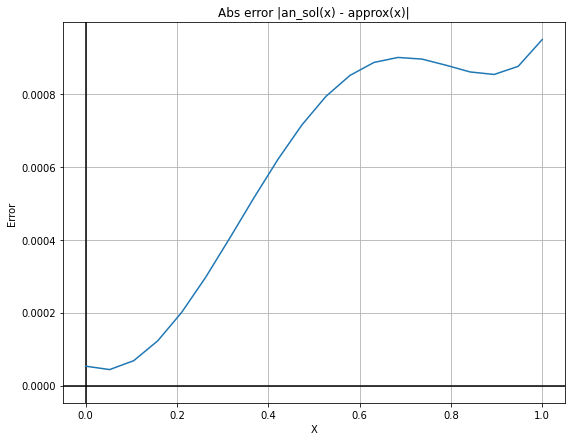

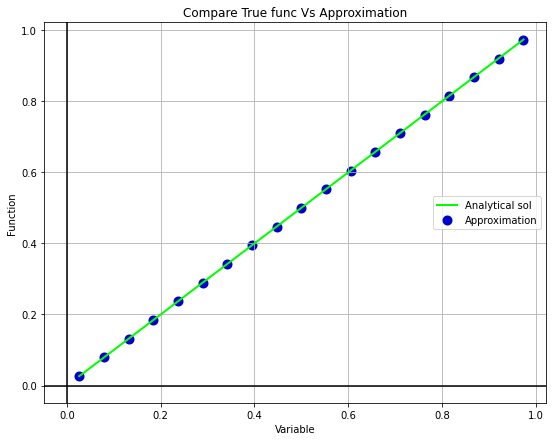

In [53]:
analytical_solution = lambda x_var: x_var
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

In [55]:
report.print_comparison_table()

train data
     Input_X  Analytical_F     ANN_F  Abs error
0   0.000000      0.000000 -0.000053   0.000053
1   0.052632      0.052632  0.052588   0.000044
2   0.105263      0.105263  0.105195   0.000068
3   0.157895      0.157895  0.157772   0.000122
4   0.210526      0.210526  0.210326   0.000201
5   0.263158      0.263158  0.262861   0.000297
6   0.315789      0.315789  0.315385   0.000404
7   0.368421      0.368421  0.367907   0.000514
8   0.421053      0.421053  0.420433   0.000620
9   0.473684      0.473684  0.472970   0.000714
10  0.526316      0.526316  0.525523   0.000793
11  0.578947      0.578947  0.578097   0.000850
12  0.631579      0.631579  0.630693   0.000886
13  0.684211      0.684211  0.683311   0.000899
14  0.736842      0.736842  0.735947   0.000895
15  0.789474      0.789474  0.788596   0.000878
16  0.842105      0.842105  0.841246   0.000860
17  0.894737      0.894737  0.893884   0.000853
18  0.947368      0.947368  0.946493   0.000875
19  1.000000      1.000000  0